# EDA To Prediction (DieTanic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

## 1. Exploratory Data Analysis (EDA)
* Analysis of the features
* Finding any relaitons or trends considering multiple features

In [2]:
data = pd.read_csv('./titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

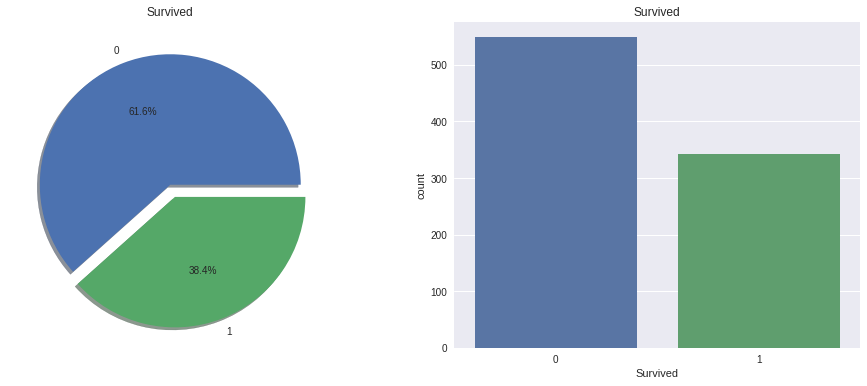

In [7]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Type Of Features

**Categorical Feature (or Nominal Variables):** Sex, Embarked

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, Gender with two categories(Male and Female).


**Ordinal Feature:** PClass

n ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For example, Height with values (Tall, Medium, Short). 


**Continuous Feature:** Age

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

### Analysing The Features
#### Sex: Categorical Feature

In [8]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
data[['Sex', 'Survived']].head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [10]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


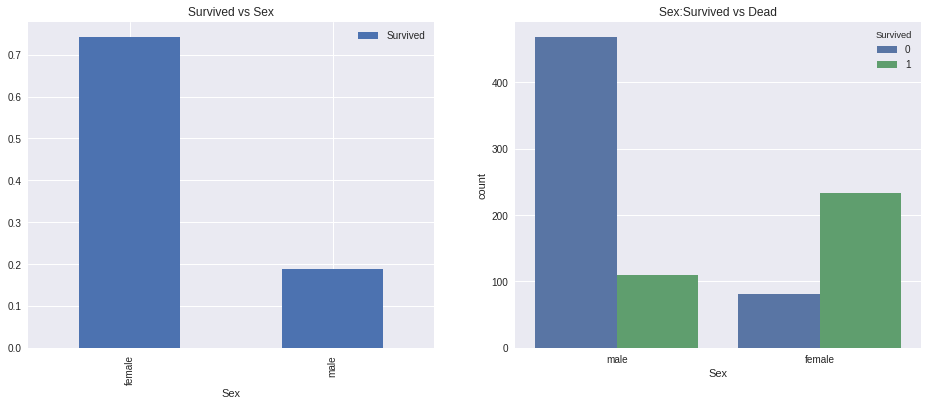

In [11]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Pclass: Ordinal Feature